In [12]:
import seibot.seibot

In [13]:
ham8_bot = seibot.seibot.Seibot("../config/example_config.ini")

CDS error


In [14]:
ham8_bot.isolation_system.relative_sensor.f

(array([9.76562500e-04, 1.95312500e-03, 2.92968750e-03, ...,
        2.55998047e+02, 2.55999023e+02, 2.56000000e+02]),)

In [15]:
ham8_bot.data.f

array([9.76562500e-04, 1.95312500e-03, 2.92968750e-03, ...,
       2.55998047e+02, 2.55999023e+02, 2.56000000e+02])

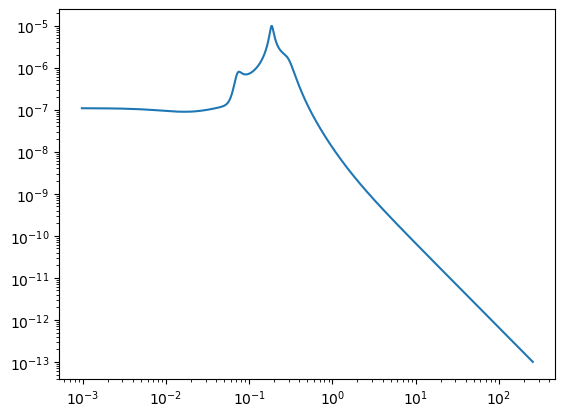

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import control

tf_ = control.tf([1,2,3],[4,5,6])
f = ham8_bot.data.f
tf = ham8_bot.data.seismic_noise

# f = np.logspace(-2, 2, 1024)
plt.loglog(f, tf)
# plt.loglog(f, abs(tf_(1j*2*np.pi*f)))

In [18]:
best_filters = ham8_bot.get_best_filters()

In [5]:
best_filters["sensor correction filter"].filter_file

'../foton_files/L1ISIHAM8.txt'

In [5]:
ham8_bot.export_best_filters("../config/example_output.ini")

Text(0.5, 0, 'Frequency (Hz)')

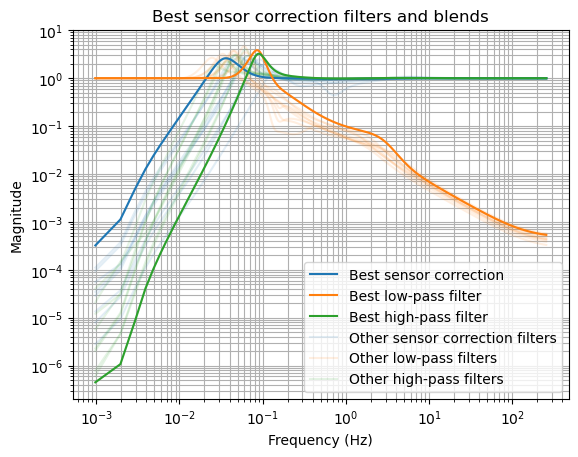

In [19]:
#plot some stuff
import numpy as np
import matplotlib.pyplot as plt

f = ham8_bot.data.f

for i in range(len(ham8_bot.filter_configurations.sc_pool)):
    sc = ham8_bot.filter_configurations.sc_pool[i]
    plt.loglog(f, abs(sc(1j*2*np.pi*f)), color="C0", alpha=0.125)
for i in range(len(ham8_bot.filter_configurations.lp_pool)):
    lp = ham8_bot.filter_configurations.lp_pool[i]
    plt.loglog(f, abs(lp(1j*2*np.pi*f)), color="C1", alpha=0.125)
for i in range(len(ham8_bot.filter_configurations.hp_pool)):
    hp = ham8_bot.filter_configurations.hp_pool[i]
    plt.loglog(f, abs(hp(1j*2*np.pi*f)), color="C2", alpha=0.125)

sc = best_filters["sensor correction filter"]
lp = best_filters["low pass filter"]
hp = best_filters["high pass filter"]
plt.title("Best sensor correction filters and blends")
plt.loglog(f, abs(sc(1j*2*np.pi*f)), color="C0", label="Best sensor correction")
plt.loglog(f, abs(lp(1j*2*np.pi*f)), color="C1", label="Best low-pass filter")
plt.loglog(f, abs(hp(1j*2*np.pi*f)), color="C2", label="Best high-pass filter")

plt.loglog([], [], color="C0", alpha=0.125, label="Other sensor correction filters")
plt.loglog([], [], color="C1", alpha=0.125, label="Other low-pass filters")
plt.loglog([], [], color="C2", alpha=0.125, label="Other high-pass filters")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Magnitude")
plt.xlabel("Frequency (Hz)")
# plt.savefig("best_filters.png", bbox_inches="tight")

In [20]:
displacement_matrix = ham8_bot.evaluate.displacement_matrix

In [21]:
isolation_system = ham8_bot.isolation_system
isolation_system.filter_configuration = best_filters
displacement = isolation_system.get_displacement(f, ham8_bot.data.seismic_noise)

Text(0.5, 0, 'Frequency (Hz)')

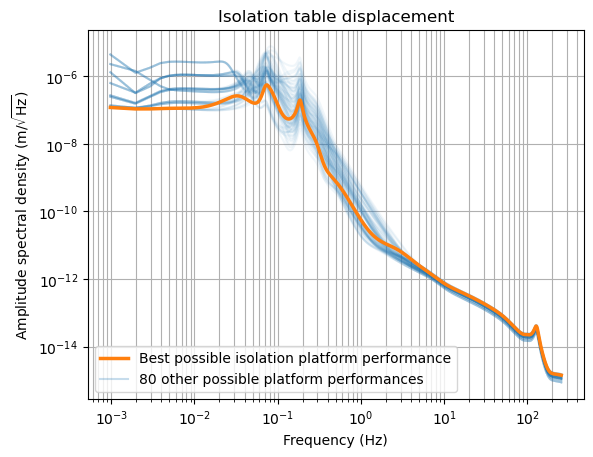

In [22]:
plt.title("Isolation table displacement")
for i in range(len(displacement_matrix)):
    for j in range(len(displacement_matrix[0])):
        plt.loglog(f, displacement_matrix[i, j], color="C0", alpha=0.0625)

# plt.loglog(f, ham8_bot.data.seismic_noise, "C2", alpha=0.75, label="Seismic_noise")
# plt.loglog(f, isolation_system.seismometer.noise, "C3", alpha=0.75, label="Seismometer noise")
# plt.loglog(f, isolation_system.relative_sensor.noise, "C4", alpha=0.75, label="Relative sensor noise")
# plt.loglog(f, isolation_system.inertial_sensor.noise, "C5", alpha=0.75, label="Inertial sensor noise")
plt.loglog(f, displacement, color="C1", lw=2.5, label="Best possible isolation platform performance")
plt.loglog([], [], color="C0", alpha=0.25, label="80 other possible platform performances")

plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Amplitude spectral density (m/$\sqrt{\mathrm{Hz}}$)")
plt.xlabel("Frequency (Hz)")
# plt.savefig("best_displacement.png", bbox_inches="tight")